/tmp/ipykernel_19710/4197131724.py:60: RuntimeWarning: overflow encountered in ubyte_scalars
  d=abs(image_enh[i,j]-image[i,j])
/tmp/ipykernel_19710/4197131724.py:70: RuntimeWarning: overflow encountered in ubyte_scalars
  d=(image_enh[i,j]-image[i,j])**2


mean abs error is :  154.767011981454
mean square error is :  0.3356233172854837


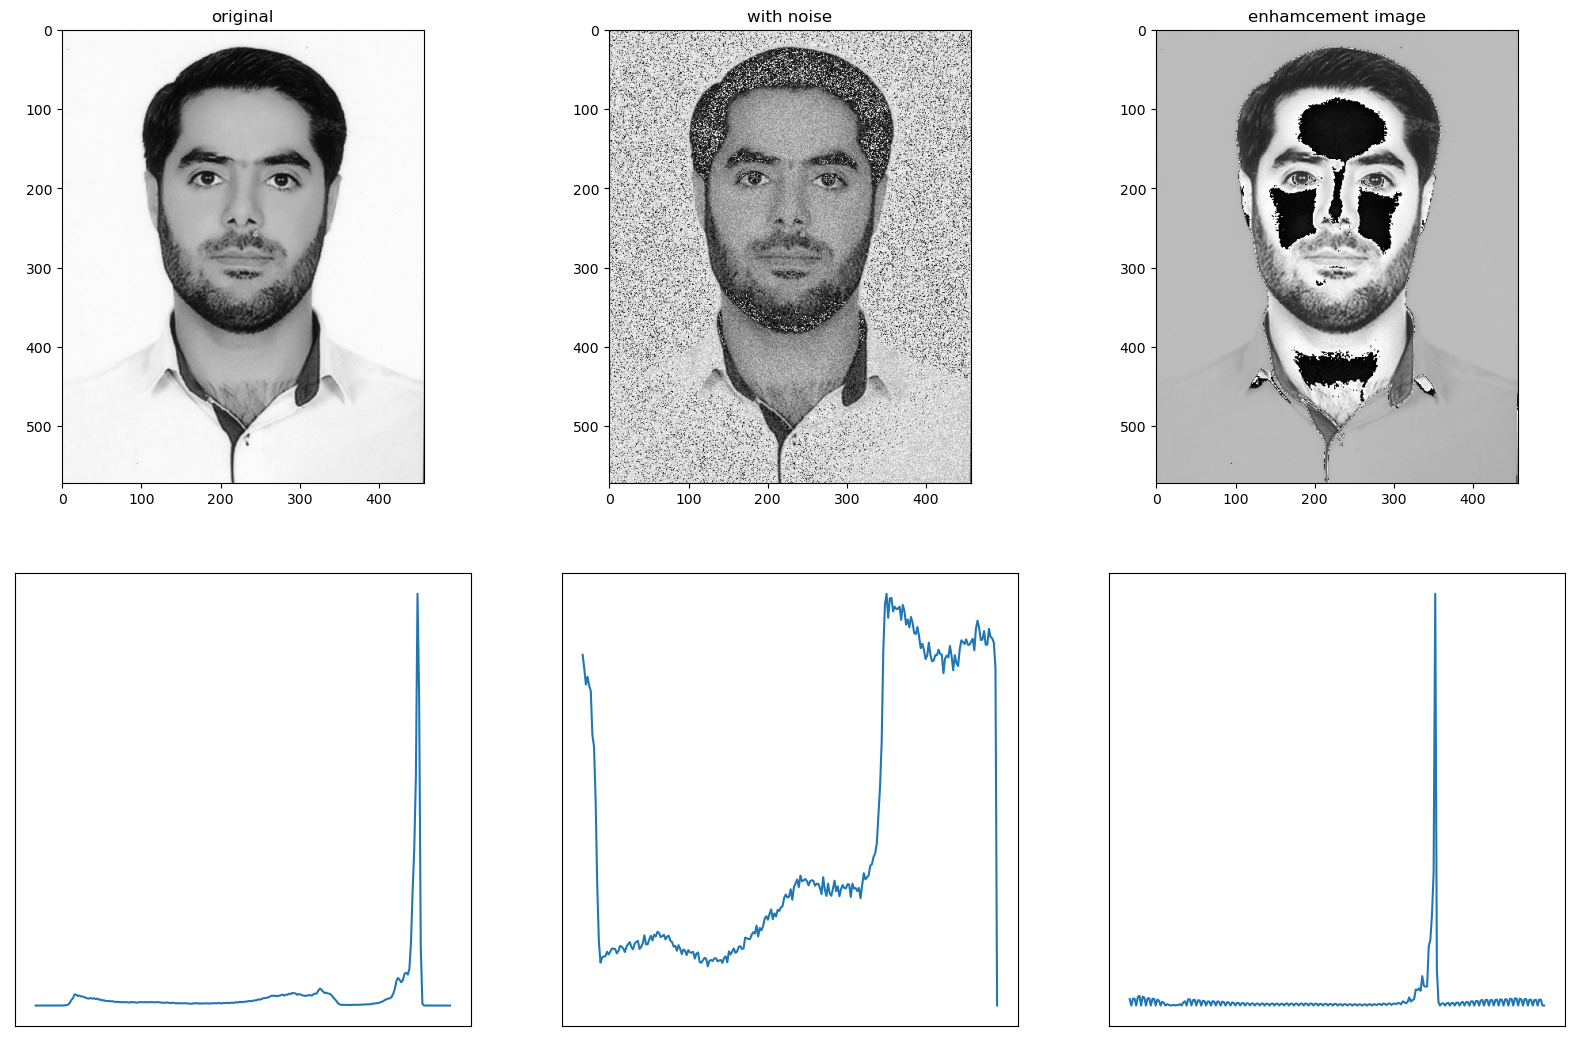

In [39]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def enhancement_image(img):
    return img
#-------------------------------------------- original image --------------------------------------------
image=cv.imread('sam.jpg',0)
plt.figure(figsize=(20,20))

plt.subplot(331)
plt.imshow(image,cmap='gray')
plt.title('original')

hist=cv.calcHist([image],[0],None,[256],[0,255])
plt.subplot(334)
plt.plot(hist)
plt.xticks([])
plt.yticks([])
#-------------------------------------------- image with noise --------------------------------------------
row , col=image.shape
image_noise=image.copy()
for i in range(row):
    for j in range(col):
        image_noise[i,j]=image[i,j]+np.random.randint(-50,30)
plt.subplot(332)
plt.imshow(image_noise,cmap='gray')
plt.title('with noise')
#plt.imsave('new.jpg',new_image,cmap='gray')

hist_noise=cv.calcHist([image_noise],[0],None,[256],[0,255])
plt.subplot(335)
plt.plot(hist_noise)
plt.xticks([])
plt.yticks([])
#--------------------------------------------- enhancement image --------------------------------------------
image_enh=image.copy()
cross=np.mean(image)
for i in range(row):
    for j in range(col):
        if image[i,j] >= cross :
            image_enh[i,j]=image[i,j]*0.8
        else:
            image_enh[i,j]=image[i,j]*1.5
plt.subplot(333)
plt.imshow(image_enh,cmap='gray')
plt.title('enhamcement image')

hist_enh=cv.calcHist([image_enh],[0],None,[256],[0,255])
plt.subplot(336)
plt.plot(hist_enh)
plt.xticks([])
plt.yticks([])

#-------------------------------------------- calculte mean abs error -------------------------------------------
mean_abs_error=0
s=0
for i in range(row):
    for j in range(col):
        d=abs(image_enh[i,j]-image[i,j])
        s=s+d
mean_abs_error=s/(row*col)
print('mean abs error is : ',mean_abs_error)

#-------------------------------------------- calculte mean square error -------------------------------------------
mean_square_error=0
s2=0
for i in range(row):
    for j in range(col):
        d=(image_enh[i,j]-image[i,j])**2
        s2=s2+d
        s=np.sqrt(s2)
mean_square_error=s/(row*col)
print('mean square error is : ',mean_square_error)

plt.show()
    